In [28]:
%load_ext autoreload
%autoreload 2

In [29]:
# Skip this cell if CSR2D/ is already added under PYHTONPATH 
import os, sys
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)  

In [34]:
from csr2d.core import psi_s, psi_x, Ws, Wx
import numpy as np

In [36]:
# Longitudinal and transverse potential functions
print(psi_s(0,0.002,0.999))
print(psi_x(0,0.002,0.999))

0.998004561762114
1.99800299409999


In [38]:
import matplotlib.pyplot as plt

gamma = 500
rho = 1
sigmax = 10E-6
sigmaz = 10E-6
dz = 0.09*sigmaz
dx = 0.09*sigmax

zvec,xvec, WsConv = Ws(gamma,rho,sigmaz,sigmax,dz,dx)
zvec,xvec, WxConv = Wx(gamma,rho,sigmaz,sigmax,dz,dx)

Text(0, 0.5, 'Ws$(10^6 m^{-2})$')

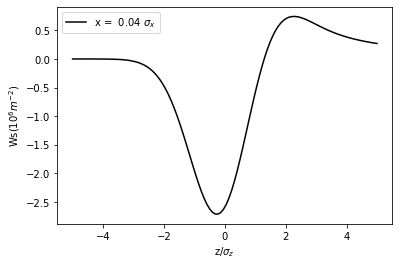

In [42]:
xcenix = int(np.floor(xvec.shape[0]/2)) # find the index for which xvec[index] is closest to zero
plt.plot(zvec/sigmaz, WsConv[:,int(xcenix)]/1e6, '-', color='black', label=f"x = {xvec[xcenix]/sigmax:5.2f} $\sigma_x$");
plt.legend(loc='upper left')
plt.xlabel('z/$\sigma_z$')
plt.ylabel('Ws$(10^6 m^{-2})$')

Text(0, 0.5, 'Wx$(10^6 m^{-2})$')

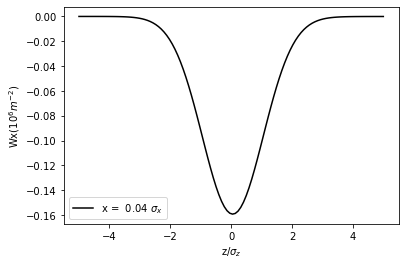

In [44]:
plt.plot(zvec/sigmaz, WxConv[:,int(xcenix)]/1e6, '-', color='black', label=f"x = {xvec[xcenix]/sigmax:5.2f} $\sigma_x$");
plt.legend(loc='lower left')
plt.xlabel('z/$\sigma_z$')
plt.ylabel('Wx$(10^6 m^{-2})$')